In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t

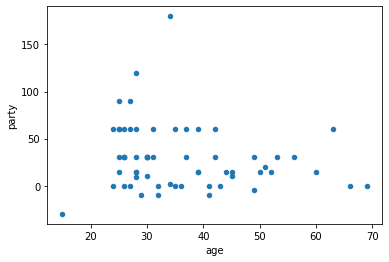

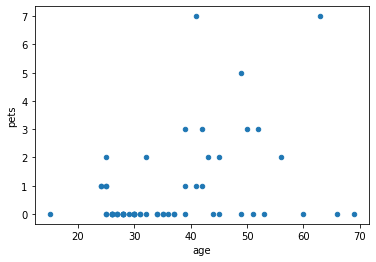

In [2]:
#12
df = pd.read_csv("dentist.csv")

df.plot.scatter("age", "party")
plt.show()

df.plot.scatter("age", "pets")
plt.show()

In [3]:
#13

df1 = df[["age", "party"]]
df2 = df[["age", "pets"]]

N = len(df)
print(f"N={N}")

df1_diff = df1 - df1.mean()
df1_std = df1.std()
cov1 = (df1_diff["age"] * df1_diff["party"]).sum() / (N - 1)
r1 = cov1 / (df1_std["age"] * df1_std["party"])
print(f"r1 = {r1}")

df2_diff = df2 - df2.mean()
df2_std = df2.std()
cov2 = (df2_diff["age"] * df2_diff["pets"]).sum() / (N - 1)
r2 = cov2 / (df2_std["age"] * df2_std["pets"])
print(f"r2 = {r2}")

N=61
r1 = -0.16421412606556712
r2 = 0.37576461379834125


In [4]:
#16
t_critical_non_directional = t(25 - 2).ppf(1 - 0.05/2)
print(t_critical_non_directional)

2.0686576104190406


In [5]:
# 18
nu = N - 2 #degree of freedom
print(f"nu = {nu}")

def r2t(r, N):    
    return r * (nu)** 0.5 / (1 - r**2)**0.5

def t2r(t, N):
    return np.sign(t) * ((nu / t**2) + 1) ** (-0.5)
    
t1 = r2t(r1, N) 
print(f"t1 = {t1}")

t2 = r2t(r2, N)
print(f"t2 = {t2}")

# ci = t(23).ppf(1 - 0.05/2) # the lecture miscalculated CI using nu=23 instead of nu=59 here.
ci = t(nu).ppf(1 - 0.05/2)
print(f"ci = {ci}")

t1_95 = np.array([t1 - ci, t1 + ci])
r1_95 = t2r(t1_95, N)
print(f"r1_95 = {r1_95}")

t2_95 = np.array([t2 - ci, t2 + ci])
r2_95 = t2r(t2_95, N)
print(f"r2_95 = {r2_95}")

p1 = 2 * t(nu).cdf(t1)
print(f"p1 = {p1}")

p2 = 2 * (1 - t(nu).cdf(t2))
print(f"p2 = {p2}")


nu = 59
t1 = -1.278711507738824
t2 = 3.11455228651063
ci = 2.00099537704821
r1_95 = [-0.3926836   0.09362035]
r2_95 = [0.14347291 0.55430883]
p1 = 0.20600567570348224
p2 = 0.0028422754334425093


In [6]:
# 19
df3 = df2.copy()
df3 = df3.append({"age": 20, "pets": 8}, ignore_index=True)
N = len(df3)
nu = N - 2
df3_diff = df3 - df3.mean()
df3_std = df3.std()
cov3 = (df3_diff["age"] * df3_diff["pets"]).sum() / (N - 1)
r3 = cov3 / (df3_std["age"] * df3_std["pets"])
print(f"r3 = {r3}")

t3 = r2t(r3, N)
print(f"t3 = {t3}")

p3 = 2 * (1 - t(nu).cdf(t3))
print(f"p3 = {p3}")

r3 = 0.23148091642148153
t3 = 1.8431031740533546
p3 = 0.07025500392476247
